In [ ]:
from google.colab import drive
drive.mount('/content/gdrive') 

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [ ]:
import pickle

# Getting back the objects:

with open('/content/gdrive/My Drive/Colab Notebooks/galaxy_data.pkl', 'rb') as f:  
    X_train, y_train, X_test = pickle.load(f)

In [ ]:
from sklearn.model_selection import train_test_split

partial_x_train, x_validation, partial_y_train, y_validation = train_test_split(X_train, y_train, test_size = 0.1)

In [ ]:
from keras.preprocessing.image import ImageDataGenerator

datagen = ImageDataGenerator(rescale=1./255)
train_iterator = datagen.flow(partial_x_train, partial_y_train)
validation_iterator = datagen.flow(x_validation, y_validation)
X_test = X_test.astype('float32') / 255

In [ ]:
from keras import layers
from keras import models

model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu',
                         input_shape=X_train.shape[1:]))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten())
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dropout(0.05))
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(256, activation='relu'))
model.add(layers.Dense(22, activation='sigmoid'))

In [ ]:
from keras import metrics
model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=[metrics.RootMeanSquaredError()])

In [ ]:
history=model.fit(train_iterator, 
                  validation_data=validation_iterator, 
                  epochs=55, 
                  steps_per_epoch=100, 
                  validation_steps=55)

Epoch 1/55
100/100 [==============================] - 39s 51ms/step - loss: 0.3981 - root_mean_squared_error: 0.2260 - val_loss: 0.3388 - val_root_mean_squared_error: 0.1752
Epoch 2/55
100/100 [==============================] - 4s 35ms/step - loss: 0.3370 - root_mean_squared_error: 0.1774 - val_loss: 0.3354 - val_root_mean_squared_error: 0.1726
Epoch 3/55
100/100 [==============================] - 4s 35ms/step - loss: 0.3250 - root_mean_squared_error: 0.1658 - val_loss: 0.3238 - val_root_mean_squared_error: 0.1628
Epoch 4/55
100/100 [==============================] - 4s 37ms/step - loss: 0.3189 - root_mean_squared_error: 0.1598 - val_loss: 0.3179 - val_root_mean_squared_error: 0.1564
Epoch 5/55
100/100 [==============================] - 4s 36ms/step - loss: 0.3163 - root_mean_squared_error: 0.1585 - val_loss: 0.3141 - val_root_mean_squared_error: 0.1542
Epoch 6/55
100/100 [==============================] - 4s 36ms/step - loss: 0.3137 - root_mean_squared_error: 0.1538 - val_loss: 0.3117

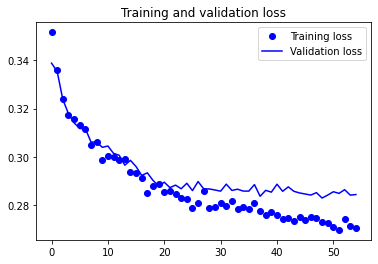

In [ ]:
import matplotlib.pyplot as plt

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(loss))

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [ ]:
from keras import optimizers
model.compile(loss='mse',
              optimizer=optimizers.RMSprop(lr=1e-5),
              metrics=[metrics.RootMeanSquaredError()])

history=model.fit(train_iterator, 
                  validation_data=validation_iterator, 
                  epochs=20, 
                  steps_per_epoch=100, 
                  validation_steps=55)

Epoch 1/20
100/100 [==============================] - 5s 39ms/step - loss: 0.0097 - root_mean_squared_error: 0.0984 - val_loss: 0.0134 - val_root_mean_squared_error: 0.1159
Epoch 2/20
100/100 [==============================] - 4s 37ms/step - loss: 0.0093 - root_mean_squared_error: 0.0964 - val_loss: 0.0132 - val_root_mean_squared_error: 0.1150
Epoch 3/20
100/100 [==============================] - 4s 36ms/step - loss: 0.0090 - root_mean_squared_error: 0.0948 - val_loss: 0.0132 - val_root_mean_squared_error: 0.1150
Epoch 4/20
100/100 [==============================] - 4s 37ms/step - loss: 0.0091 - root_mean_squared_error: 0.0952 - val_loss: 0.0132 - val_root_mean_squared_error: 0.1151
Epoch 5/20
100/100 [==============================] - 4s 36ms/step - loss: 0.0091 - root_mean_squared_error: 0.0956 - val_loss: 0.0134 - val_root_mean_squared_error: 0.1156
Epoch 6/20
100/100 [==============================] - 4s 36ms/step - loss: 0.0095 - root_mean_squared_error: 0.0972 - val_loss: 0.0133 

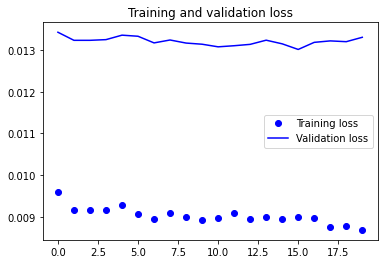

In [ ]:
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(loss))

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [ ]:
import pandas as pd
pred = model.predict(X_test)
out = pd.DataFrame(pred)
out

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21
0,0.871385,0.014981,0.016925,0.856887,0.158906,0.692182,0.592224,0.262549,0.197915,0.522480,0.102844,0.025125,0.343647,0.657532,0.058551,0.018501,0.002113,0.208048,0.077950,0.029834,0.014934,0.193127
1,0.356546,0.021654,0.054037,0.296695,0.041460,0.255276,0.051656,0.244551,0.003584,0.094872,0.171713,0.028459,0.076955,0.920654,0.023175,0.005402,0.001945,0.011163,0.000703,0.000490,0.002090,0.034583
2,0.401005,0.021173,0.089512,0.275789,0.053861,0.222906,0.058309,0.204987,0.006916,0.087708,0.143426,0.042317,0.231807,0.758467,0.082463,0.048535,0.004274,0.017613,0.000856,0.000562,0.001761,0.033590
3,0.778410,0.019131,0.615557,0.188456,0.040704,0.152448,0.079026,0.110214,0.024998,0.104742,0.057889,0.012643,0.223905,0.778946,0.092245,0.044985,0.029534,0.032115,0.000710,0.001583,0.001797,0.042845
4,0.816603,0.014543,0.217014,0.605732,0.130487,0.467058,0.335408,0.247299,0.107952,0.302859,0.132898,0.041584,0.450639,0.551417,0.131598,0.121736,0.007019,0.193195,0.007756,0.004273,0.002950,0.108489
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6245,0.260599,0.048130,0.013732,0.237510,0.017965,0.218706,0.021603,0.219824,0.008400,0.037063,0.129411,0.057626,0.699856,0.280149,0.267172,0.349533,0.001020,0.003674,0.000318,0.000076,0.000475,0.011256
6246,0.950452,0.006029,0.021932,0.924751,0.604999,0.335533,0.658467,0.264213,0.006482,0.254029,0.595905,0.076795,0.411441,0.586584,0.029322,0.011191,0.000969,0.483624,0.030506,0.007196,0.003497,0.064152
6247,0.968996,0.004941,0.029841,0.939143,0.167378,0.757679,0.903147,0.048134,0.046920,0.559611,0.317974,0.030053,0.167015,0.843797,0.033609,0.012320,0.001501,0.382429,0.177616,0.118412,0.082763,0.170053
6248,0.867164,0.012773,0.012266,0.851497,0.103191,0.758396,0.590160,0.245979,0.084141,0.519881,0.210488,0.042846,0.403260,0.592989,0.075453,0.036595,0.001935,0.180417,0.095664,0.032587,0.025694,0.209809


In [ ]:
#out.to_csv("/content/gdrive/My Drive/Colab Notebooks/predFive.csv")
